# Explore here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [20]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'


data = pd.read_csv(url, delimiter=',')

#import urllib.request
#urllib.request.urlretrieve(url, 'medical_insurance_cost.csv')

print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
v_num =['age','bmi','children','charges']
v_cat = ['sex', 'smoker', 'region']

In [23]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Variables Univariantes

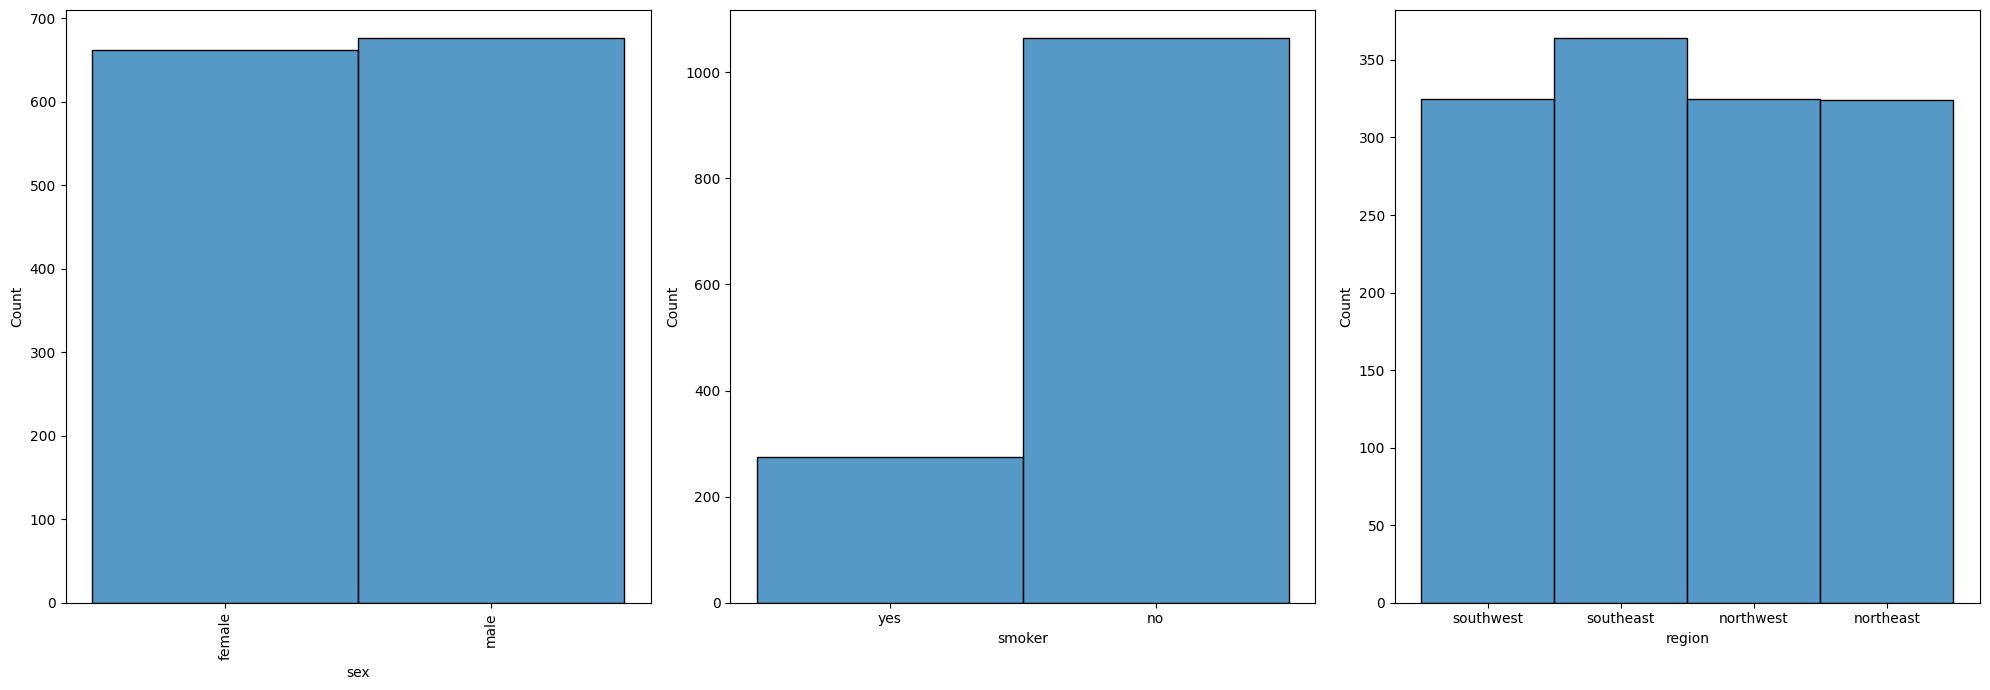

In [24]:
#CATEGORICAS
fig, axis = plt.subplots(1, 3, figsize = (20, 7))

axis[0].tick_params(axis='x', rotation=90)

sns.histplot(ax = axis[0], data = data, x = "sex")
sns.histplot(ax = axis[1], data = data, x = "smoker")
sns.histplot(ax = axis[2], data = data, x = "region")

plt.tight_layout()
plt.show()

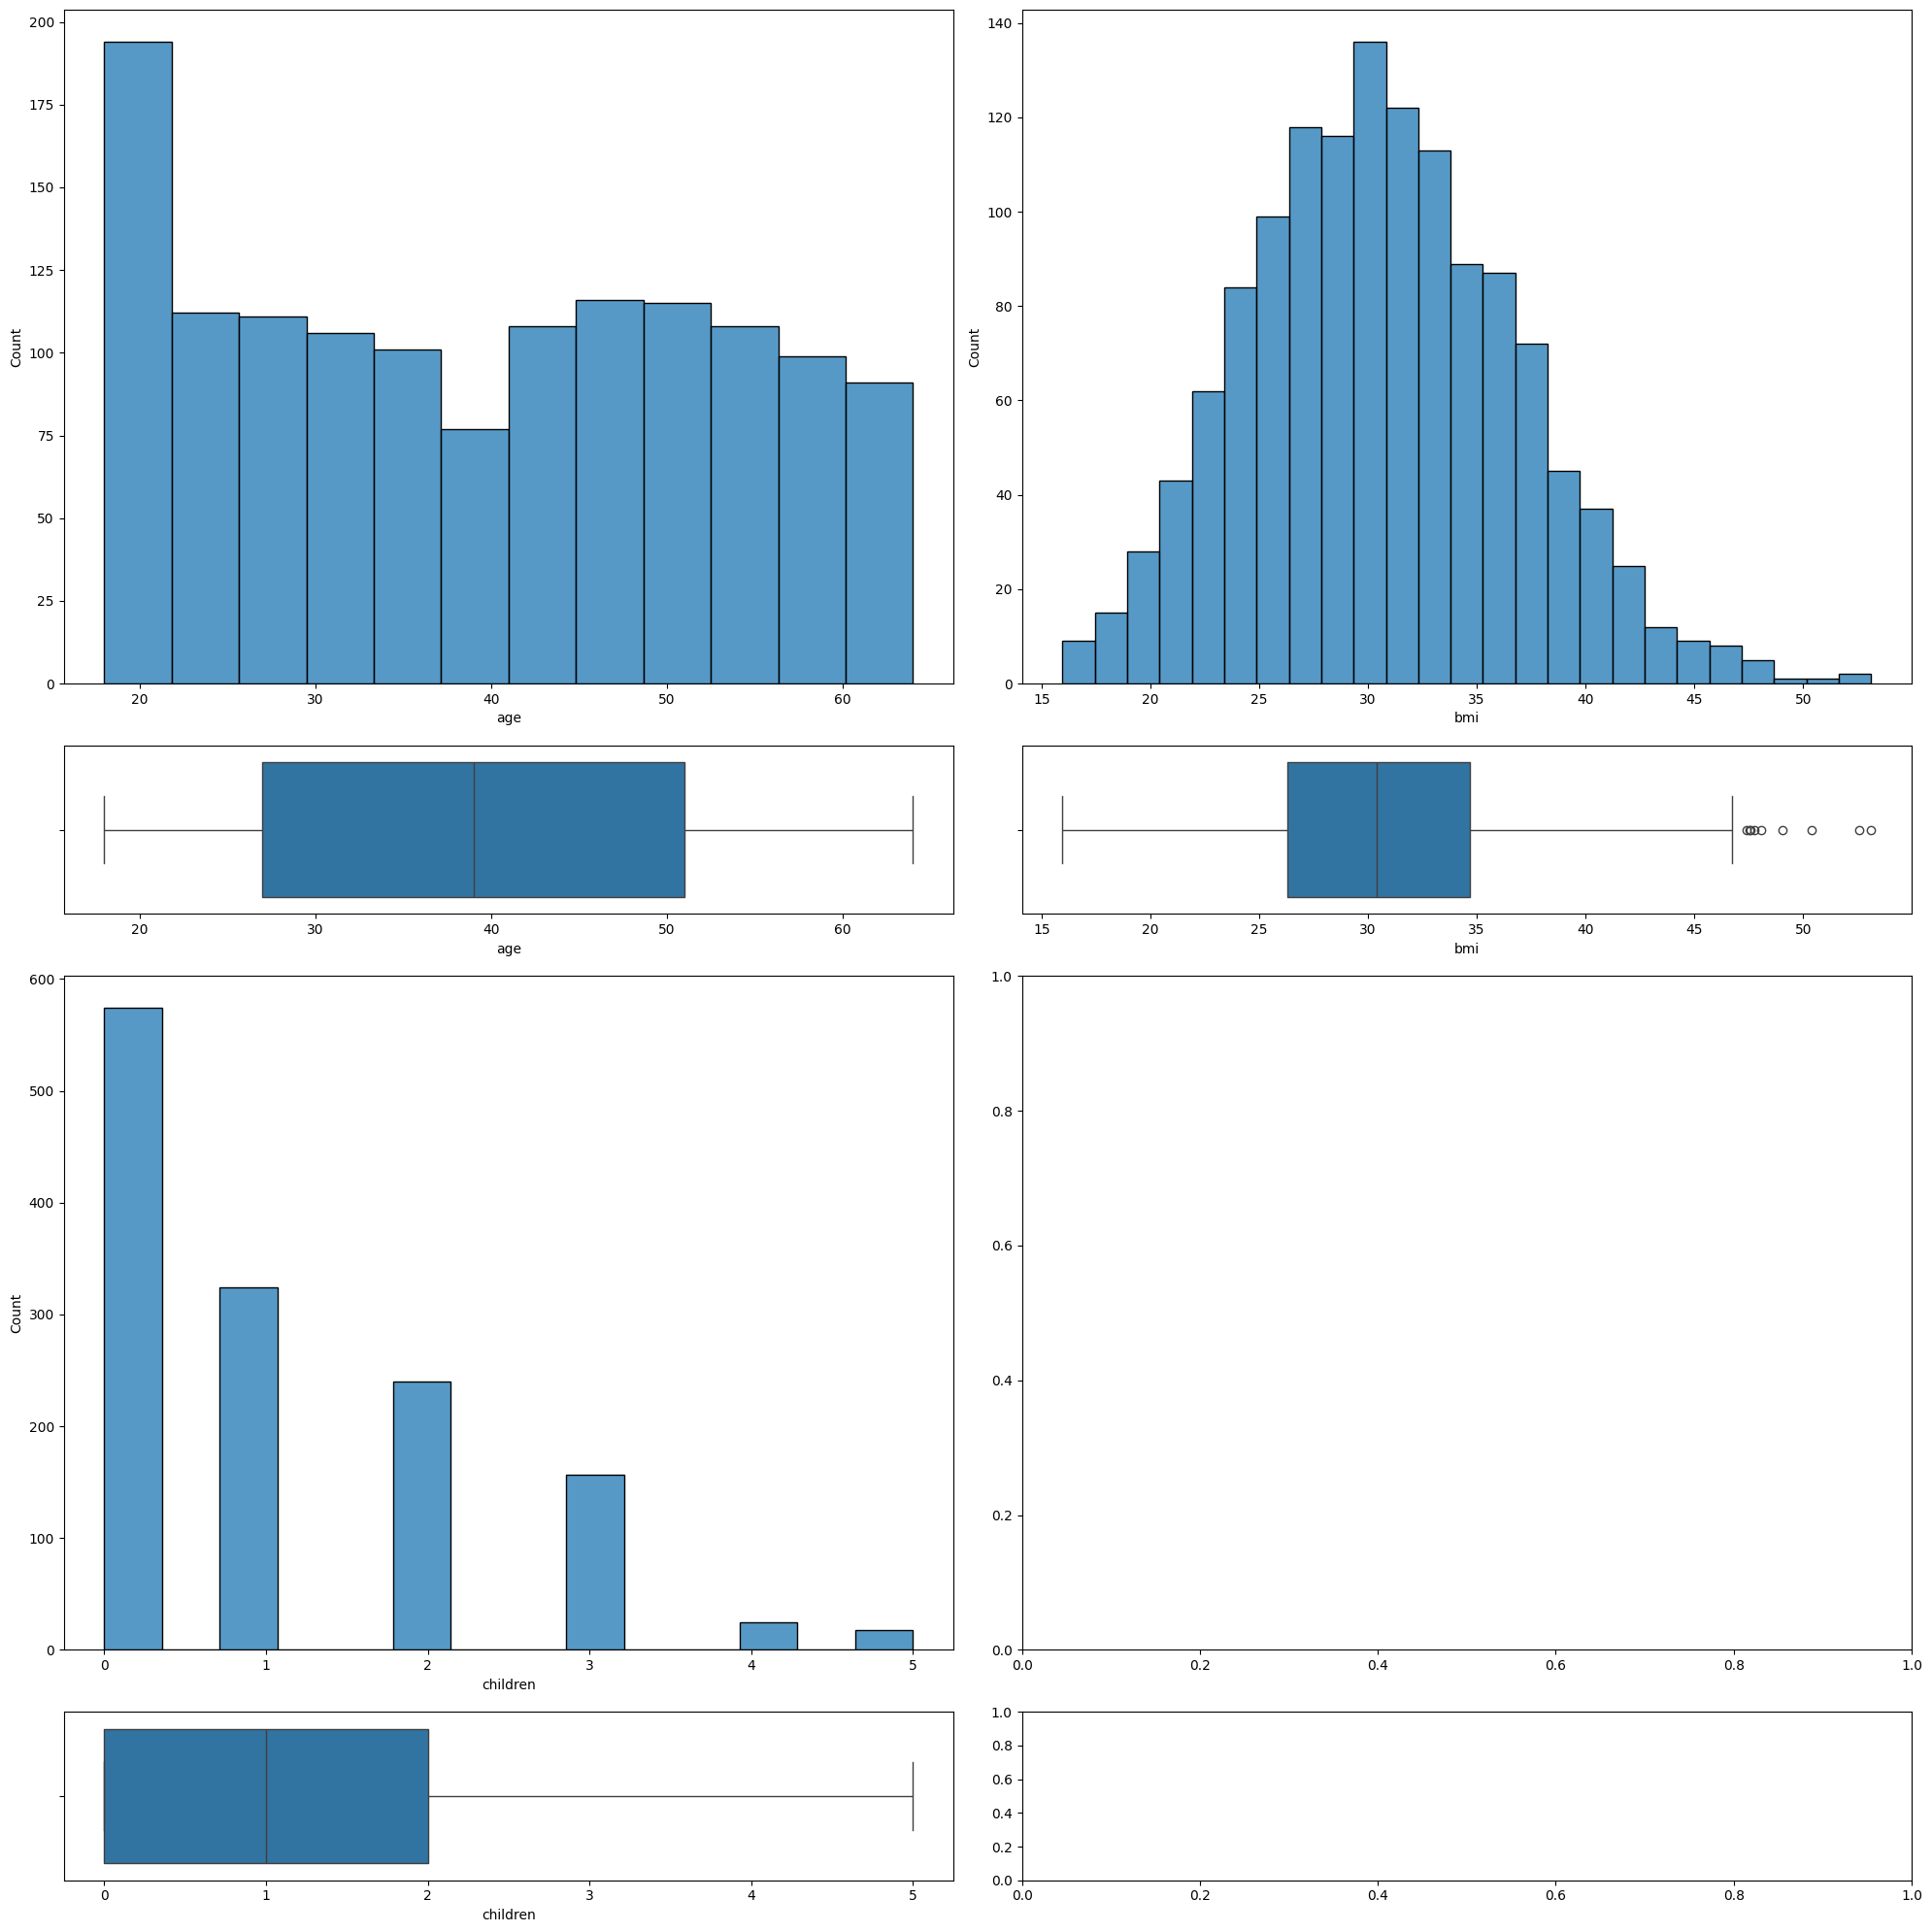

In [25]:
#NUMERICAS
fig, axis = plt.subplots(4, 2, figsize = (20, 20), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")

sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")


plt.tight_layout()
plt.show()

In [26]:
data["sex_fac"] = pd.factorize(data["sex"])[0]
data["smoker_fac"] = pd.factorize(data["smoker"])[0]
data["region_fac"] = pd.factorize(data["region"])[0]

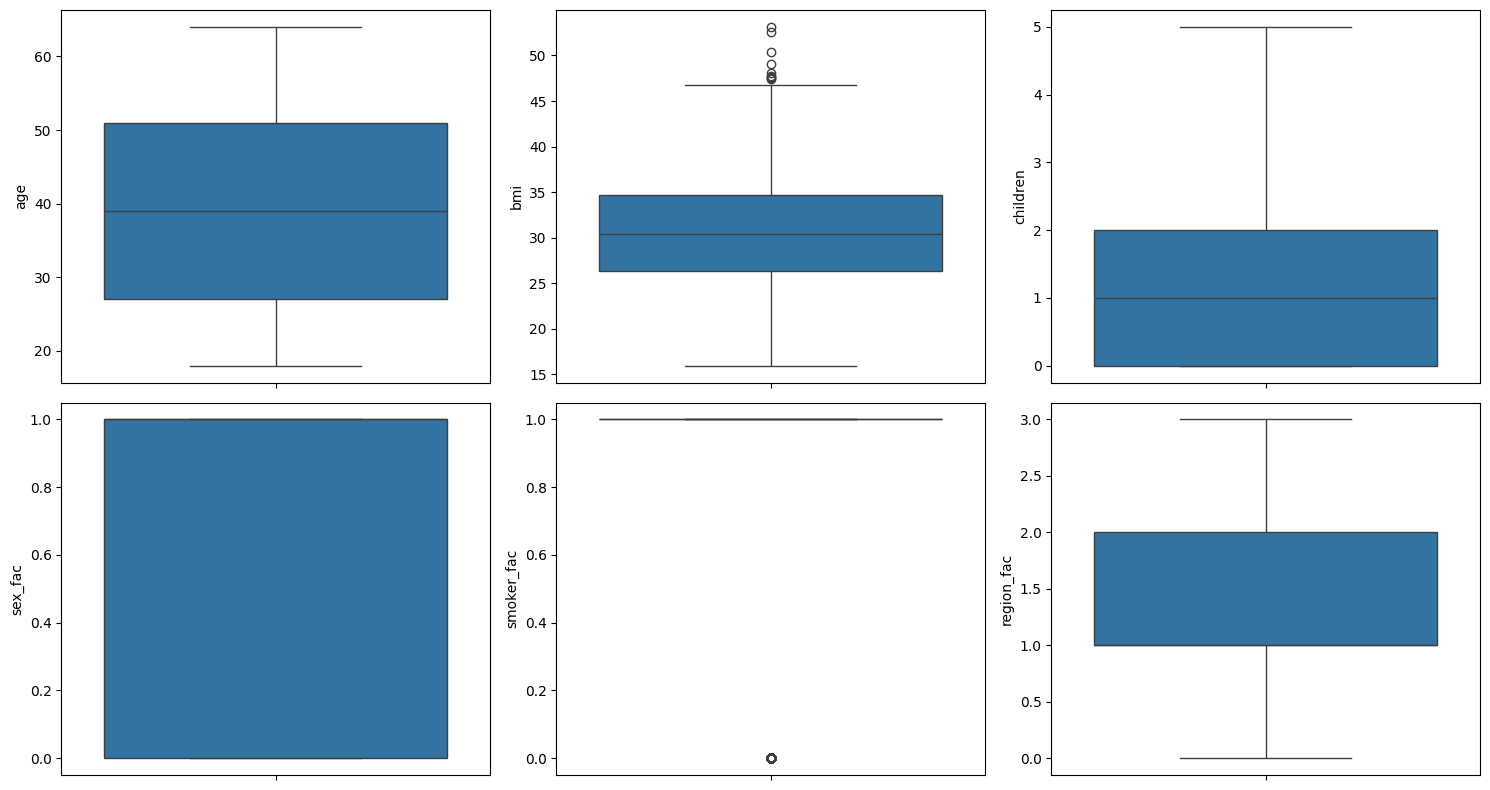

In [27]:
fig, axis = plt.subplots(2, 3, figsize = (15, 8))

sns.boxplot(ax = axis[0, 0], data = data, y = "age")
sns.boxplot(ax = axis[0, 1], data = data, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = data, y = "children")
sns.boxplot(ax = axis[1, 0], data = data, y = "sex_fac")
sns.boxplot(ax = axis[1, 1], data = data, y = "smoker_fac")
sns.boxplot(ax = axis[1, 2], data = data, y = "region_fac")

plt.tight_layout()
plt.show()

## Variables multivariantes

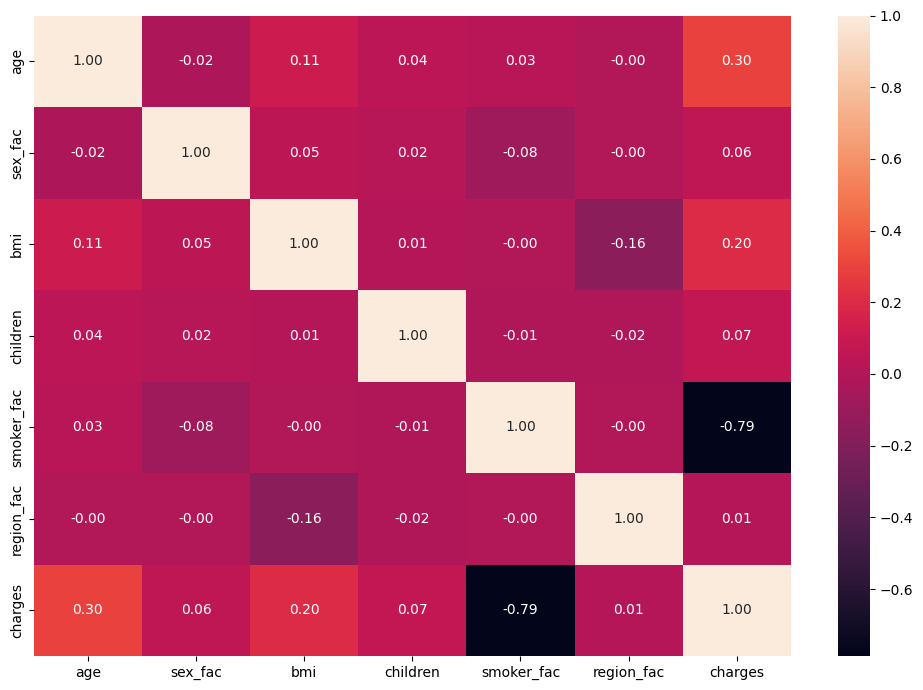

In [28]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(data[["age", "sex_fac", "bmi", "children", "smoker_fac", "region_fac", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

## Modelo

In [43]:
X = data[["bmi", "children", "sex_fac", "smoker_fac", "region_fac"]]
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# luego de probar con diferentes combinaciones,el error cuadratico 
# medio mas bajo se obtiene al dejar todas las demas variables


Mean Squared Error (MSE): 47501408.25295598
R²: 0.6851941847217752
